In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xarray as xr


In [2]:
N = 1000
time = np.arange(N)  
data_no = np.random.normal(loc=0,scale=1, size=N)  
data_ex = np.random.exponential(scale=1.0, size=N)  

The Pearson coefficient (normalized covariance) requires that our time series be normal (Gaussian distribution), stationary (statistics unchanging over time), and that each sample be independent from the others. <br />
The first thing to consider is the normal distribution. I have generated two random series, one with a Gaussian distribution and one with a non-Gaussian distribution.

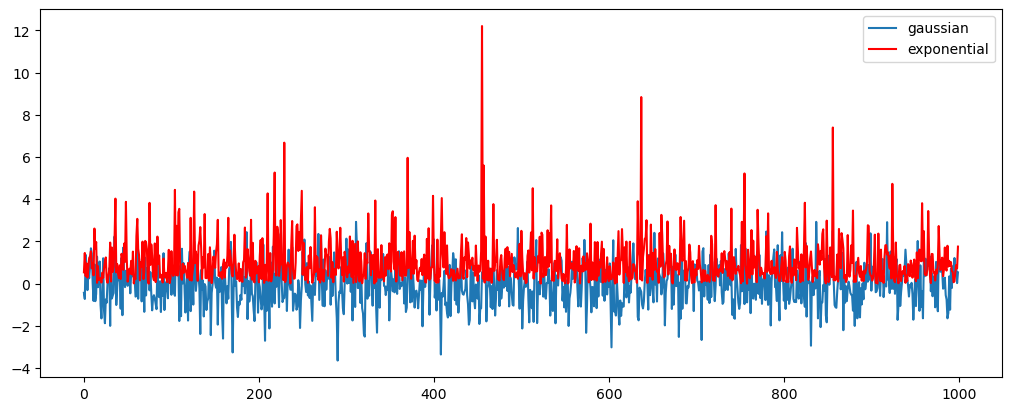

In [3]:
fig, ax = plt.subplots(figsize=(10,4), constrained_layout=True)
ax.plot(data_no,label='gaussian')
ax.plot(data_ex,label='exponential',color='r')
ax.legend()

Here I used the seaborn histplot function with kde=TRUE to (Kernel Density Estimation, used to create a smoothed curve over the histogram that represents the probability density function). <br />
It is clear they both have different distribution, but I also applied a Shapir-Wilk test to test normality, when p>0.05 (the null hypothesis that the data are normally distributed) then the data is not normally distributed.

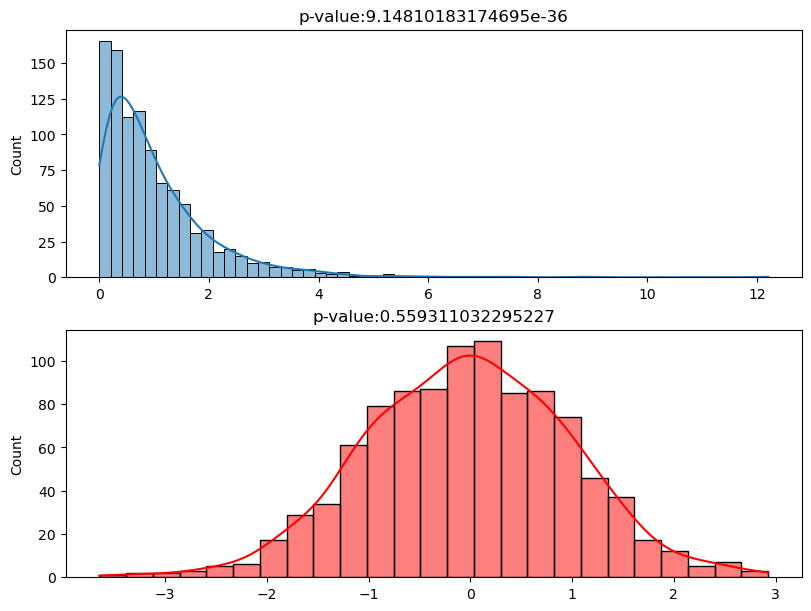

In [4]:
shapiro_ex = stats.shapiro(data_ex)
shapiro_no = stats.shapiro(data_no)



fig, axs = plt.subplots(2,1,figsize=(8,6), constrained_layout=True)
sns.histplot(data_ex,kde=True,ax=axs[0])
axs[0].set_title('p-value:'+ str(shapiro_ex.pvalue))

sns.histplot(data_no,kde=True,ax=axs[1],color='r')
axs[1].set_title('p-value:'+ str(shapiro_no.pvalue));


There is some methods to tranform non-gaussian distributions to gaussian. Here, I used boxcox and it works!

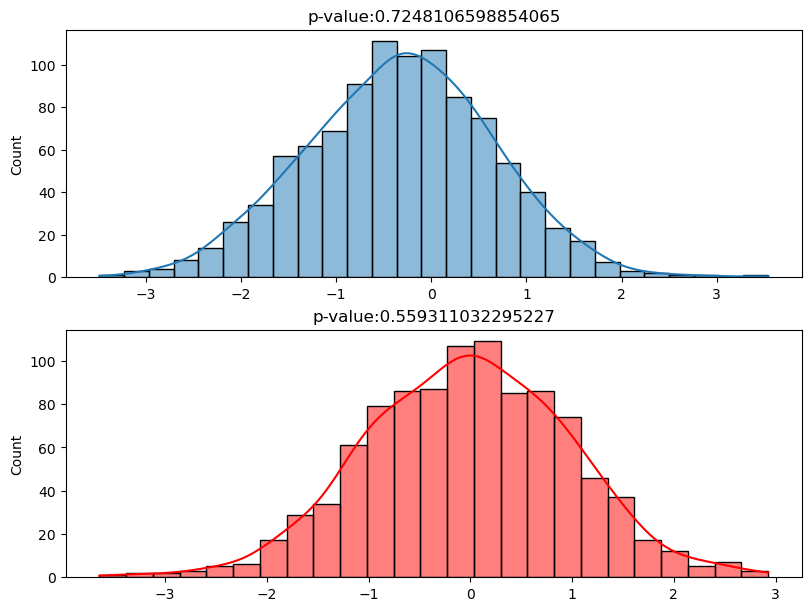

In [5]:
from scipy.stats import boxcox

shapiro_ex2 = stats.shapiro(boxcox(data_ex)[0])
shapiro_no = stats.shapiro(data_no)



fig, axs = plt.subplots(2,1,figsize=(8,6), constrained_layout=True)
sns.histplot(boxcox(data_ex)[0],kde=True,ax=axs[0])
axs[0].set_title('p-value:'+ str(shapiro_ex2.pvalue))

sns.histplot(data_no,kde=True,ax=axs[1],color='r')
axs[1].set_title('p-value:'+ str(shapiro_no.pvalue));

In [6]:
np.var(data)

NameError: name 'data' is not defined

In [ ]:
np.sum((data-np.mean(data))**2)/(len(data)-1). If the process is stationary, the properties does not change, and we can take var with N and it would be the same value